## seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import seaborn as sns


input_dir = "/Users/apple/Desktop/KB/data"
# Load dataset
adata = ad.read_h5ad(input_dir+'/LarryData/Larry_41093_2000_norm_log.h5ad')

In [4]:
adata.obs

,Library,Cell barcode,time_info,Starting population,state_info,Well,SPRING-x,SPRING-y,Time point,clone_id,n_genes
d6_2_2:GCGTGCAAAGAAGTTA,d6_2_2,GCGTGCAA-AGAAGTTA,6.0,Lin-Kit+Sca1-,Undifferentiated,2,411.496,-96.190,6,573,4050
d6_2_2:AAGGGACCCTCGATGC,d6_2_2,AAGGGACC-CTCGATGC,6.0,Lin-Kit+Sca1-,Undifferentiated,2,-587.462,-306.925,6,1440,3139
d6_2_2:CGTACCGAAGCGCCTT,d6_2_2,CGTACCGA-AGCGCCTT,6.0,Lin-Kit+Sca1-,Monocyte,2,1429.805,-429.300,6,394,2403
d6_2_2:CCGTAGCTAGGCAGTT,d6_2_2,CCGTAGCT-AGGCAGTT,6.0,Lin-Kit+Sca1-,Undifferentiated,2,-1169.594,362.010,6,1972,1608
d6_2_2:TAGGCTTTCGTGGATA,d6_2_2,TAGGCTTT-CGTGGATA,6.0,Lin-Kit+Sca1-,Neutrophil,2,1236.039,-2113.013,6,1450,1667
...,...,...,...,...,...,...,...,...,...,...,...
LSK_d6_1_3:CTGTGACCTGCTATTT,LSK_d6_1_3,CTGTGACC-TGCTATTT,6.0,Lin-Kit+Sca1+,Undifferentiated,1,307.879,-27.451,6,4999,2432
LSK_d6_1_3:AGGCGTTTCCTATTCA,LSK_d6_1_3,AGGCGTTT-CCTATTCA,6.0,Lin-Kit+Sca1+,Undifferentiated,1,-1074.917,441.981,6,12,1876
LSK_d6_1_3:CGTGCAACTGGCCTGT,LSK_d6_1_3,CGTGCAAC-TGGCCTGT,6.0,Lin-Kit+Sca1+,Undifferentiated,1,247.634,281.262,6,267,1434
LSK_d6_1_3:CCCTTGCAAGTGAAAG,LSK_d6_1_3,CCCTTGCA-AGTGAAAG,6.0,Lin-Kit+Sca1+,Neutrophil,1,353.734,-980.246,6,3534,1252


In [8]:
adata.obs["state_info"].value_counts()/adata.obs.shape[0]

state_info
Undifferentiated    0.448398
Neutrophil          0.183851
Monocyte            0.178863
Baso                0.123500
Mast                0.030394
Meg                 0.020149
Erythroid           0.007666
Eos                 0.003577
Lymphoid            0.001898
Ccr7_DC             0.000949
pDC                 0.000754
Name: count, dtype: float64

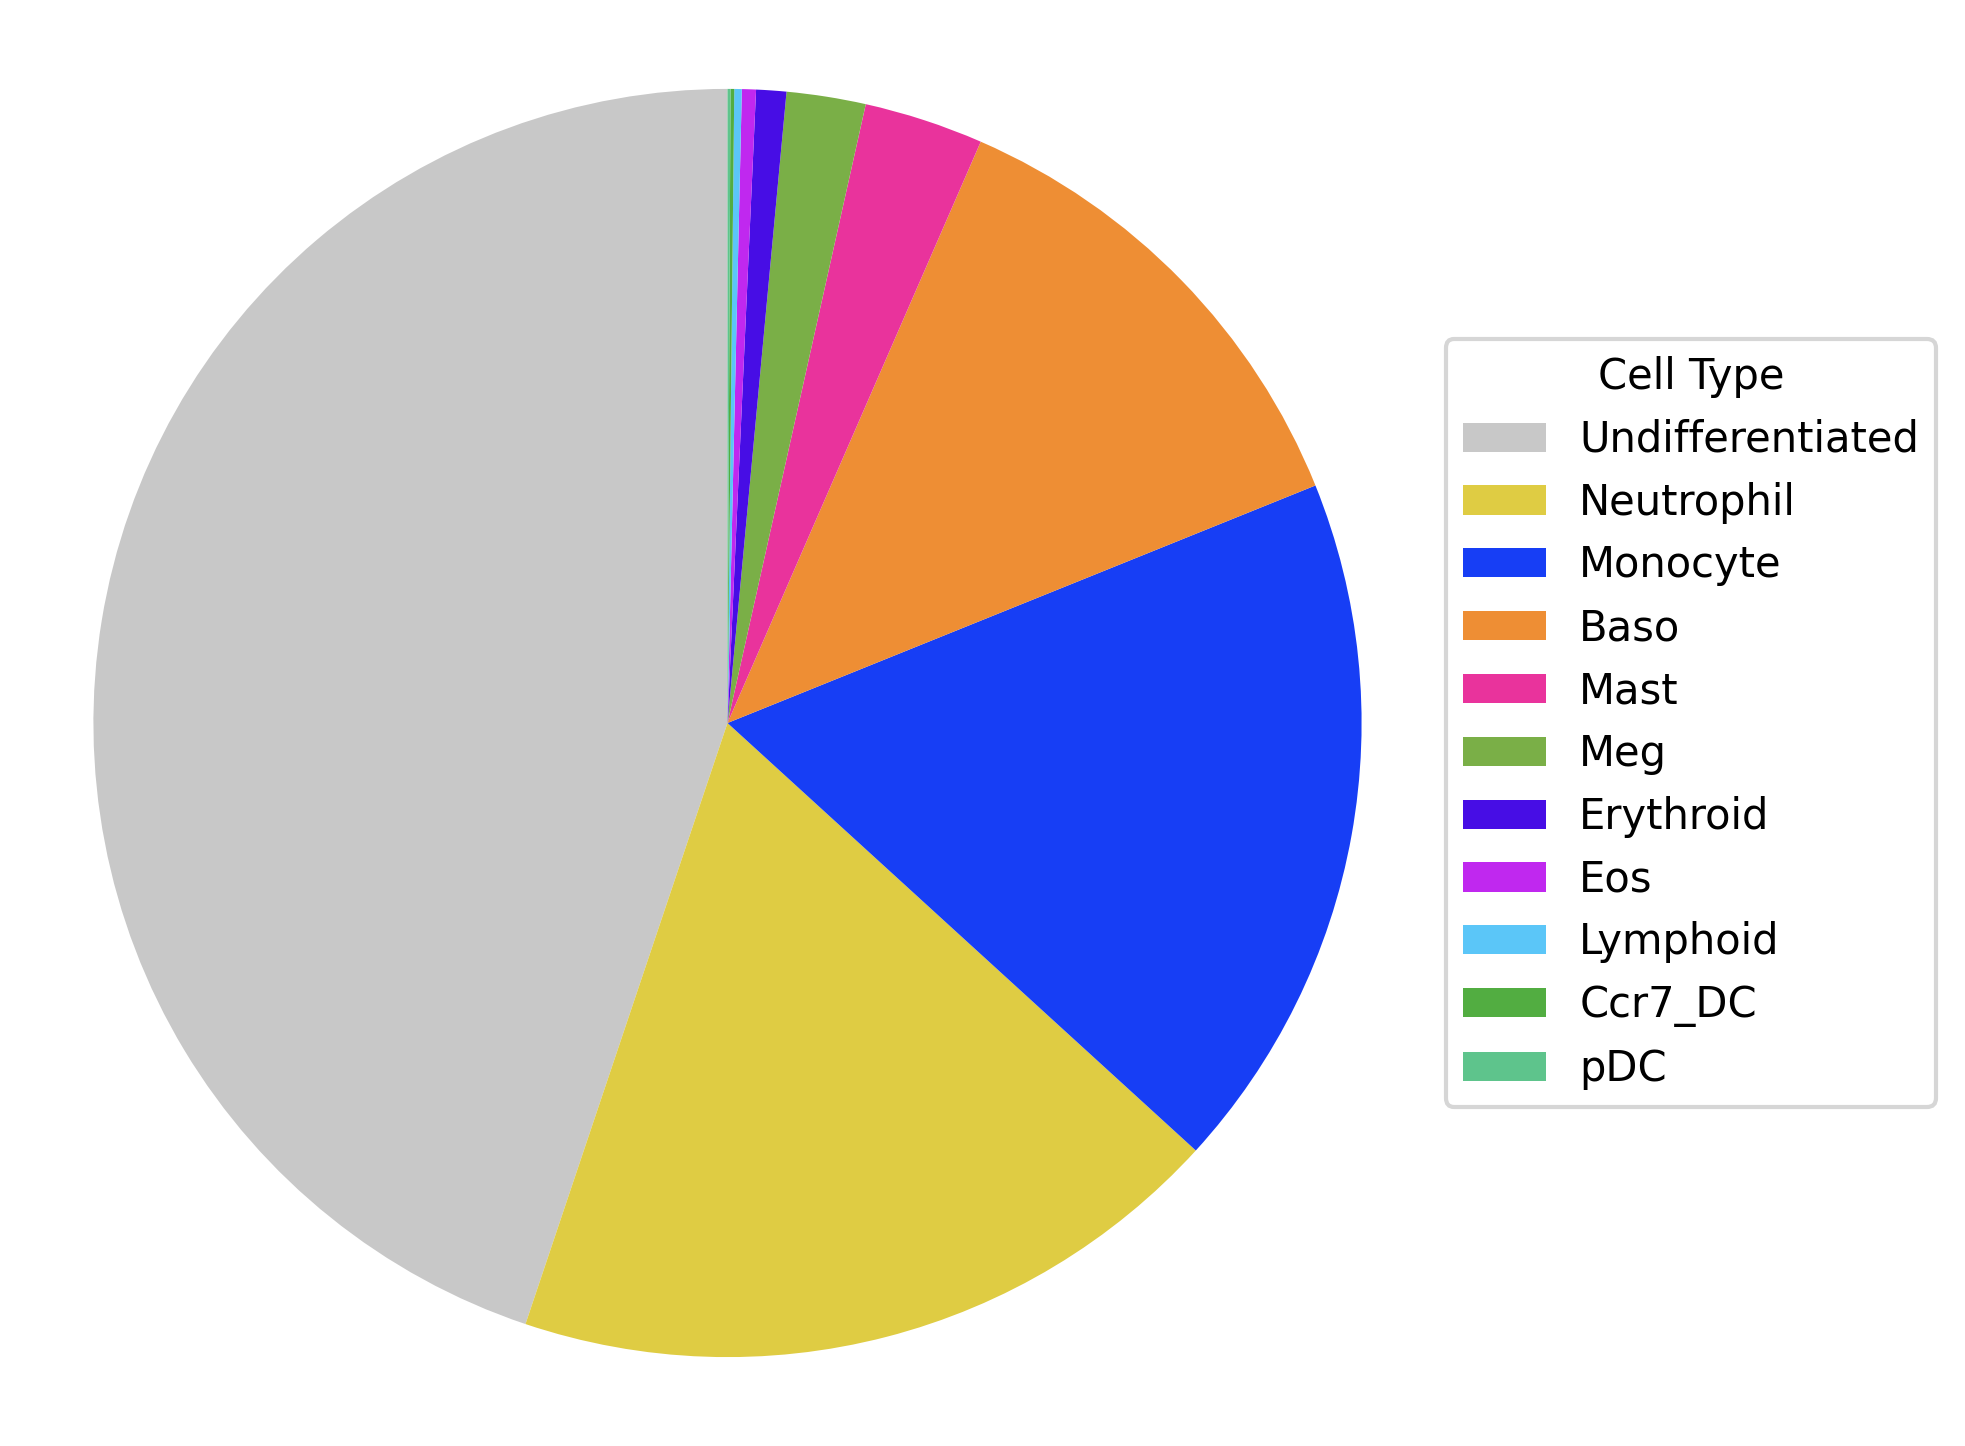

In [9]:
# Extract cell type counts
cell_type_counts = adata.obs["state_info"].value_counts()

# Define the RGB colors for the cell types (converted to hex codes)
state_info_colors = {
    'Baso': '#EE8E34',           # RGB (238, 142, 52)
    'Ccr7_DC': '#52AD41',        # RGB (82, 173, 65)
    'Eos': '#C028EF',            # RGB (192, 40, 239)
    'Erythroid': '#470DE5',      # RGB (71, 13, 229)
    'Lymphoid': '#5BC6F8',       # RGB (91, 198, 248)
    'Mast': '#E9339C',           # RGB (233, 51, 156)
    'Meg': '#7AAF47',            # RGB (122, 175, 71)
    'Monocyte': '#173EF5',       # RGB (23, 62, 245)
    'Neutrophil': '#DFCC43',     # RGB (223, 204, 67)
    'Undifferentiated': '#C8C8C8',  # RGB (200, 200, 200)
    'pDC': '#5EC48C'             # RGB (94, 196, 140)
}

# Extract the colors in the same order as the cell types
colors = [state_info_colors[cell_type] for cell_type in cell_type_counts.index]

# Plot the pie chart without percentages
plt.figure(figsize=(6, 6), dpi=300)
wedges, texts = plt.pie(cell_type_counts, colors=colors, startangle=90)

# Add legend
plt.legend(wedges, cell_type_counts.index, title="Cell Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


In [11]:
adata.obs["time_info"].value_counts()/adata.obs.shape[0]

time_info
6.0    0.659017
4.0    0.298494
2.0    0.042489
Name: count, dtype: float64

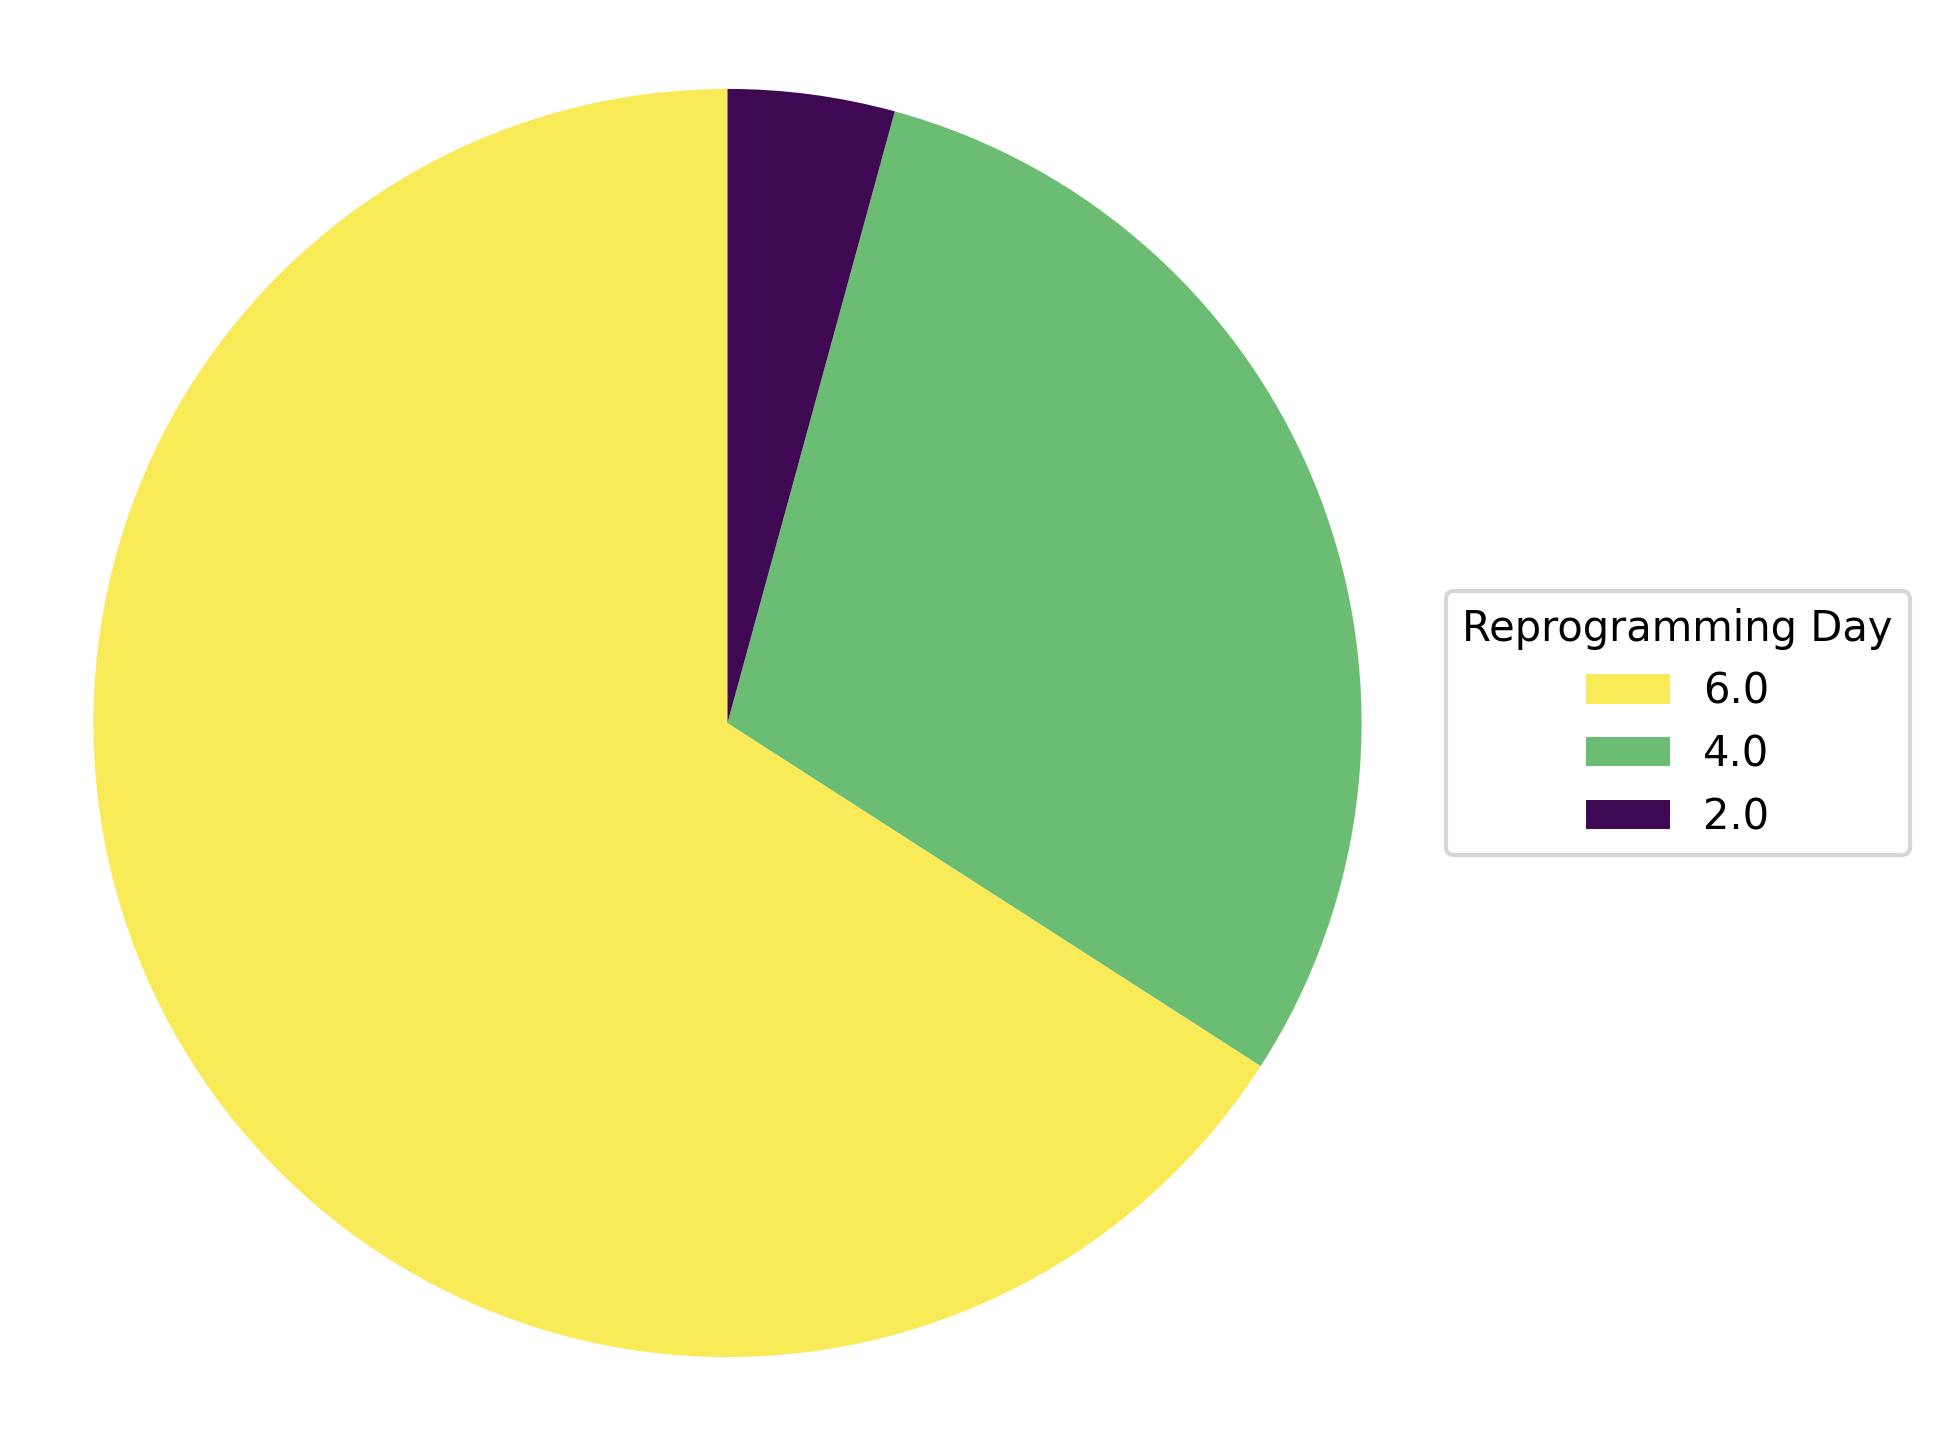

In [12]:
from matplotlib.colors import LinearSegmentedColormap

# Extract reprogramming day counts
reprogramming_day_counts = adata.obs['time_info'].value_counts()

# Get the unique reprogramming days sorted from earliest to latest
reprogramming_day_unique = np.sort(np.unique(adata.obs['time_info']))

# Define the RGB colors for the first, middle, and last timepoints (convert to 0-1 scale)
first_color = (63/255, 8/255, 82/255)
middle_color = (107/255, 189/255, 115/255)
last_color = (249/255, 234/255, 87/255)

# Create a colormap that interpolates between the first, middle, and last colors
cmap = LinearSegmentedColormap.from_list("time_colormap", [first_color, middle_color, last_color], N=len(reprogramming_day_unique))

# Generate the colors for each reprogramming day using the colormap
reprogramming_palette = [cmap(i / (len(reprogramming_day_unique) - 1)) for i in range(len(reprogramming_day_unique))]

# Create a list of colors for each reprogramming day
colors = [reprogramming_palette[np.where(reprogramming_day_unique == day)[0][0]] for day in reprogramming_day_counts.index]

# Plot the pie chart without percentages
plt.figure(figsize=(6, 6), dpi=300)
wedges, texts = plt.pie(reprogramming_day_counts, colors=colors, startangle=90)

# Add legend
plt.legend(wedges, reprogramming_day_counts.index, title="Reprogramming Day", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()
